In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [8]:
data = Table.read("0.38.0/fba_summary_dark_north.fits")

In [9]:
data[:10]

BRICKNAME,RA,DEC,TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,SUBPRIORITY,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL,NUMOBS_MORE,PRIORITY,OBSCONDITIONS,NUMOBS,NAVAIL_FIBER,NAVAIL_TILE,isELG,isLRG,isQSO,isBGS_ANY,isMWS_ANY
str8,float64,float64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int32,int64,int64,int64,bool,bool,bool,bool,bool
2167m107,216.8464346981716,-10.631225643751602,35185502982242305,2305843009213693952,0,1280,0.7396276947742041,1500,1,44961,1,1500,7,0,0,0,False,False,False,False,True
2167m107,216.8232802388411,-10.631043231388466,35185502982242310,2305843009213693952,0,1280,0.8315815337390279,1500,1,44961,1,1500,7,0,0,0,False,False,False,False,True
2167m107,216.63532410918964,-10.62976846023926,35185502982242317,2305843009213693952,0,33,0.7408296894169162,1400,1,44963,1,1400,7,0,0,0,False,False,False,False,True
2167m107,216.827705060818,-10.626414608342792,35185502982242349,2305843009213693952,0,33,0.18390937846226307,1400,1,44961,1,1400,7,0,0,0,False,False,False,False,True
2172m107,217.251602945333,-10.63274678933654,35185502990630925,2305843009213693952,0,10240,0.20978819149668537,1500,1,44961,1,1500,7,0,0,0,False,False,False,False,True
2172m107,217.24612406328052,-10.63117808838864,35185502990630934,2305843009213693952,0,1280,0.6124344653142545,1500,1,44961,1,1500,7,0,0,0,False,False,False,False,True
2172m107,217.28779297180262,-10.626230187432464,35185502990630948,2305843009213693952,0,10240,0.7092287432531261,1500,1,44961,1,1500,7,0,0,0,False,False,False,False,True
2172m107,217.28233708653616,-10.6256657575561,35185502990630950,2305843009213693952,0,1280,0.631502532457974,1500,1,44961,1,1500,7,0,0,0,False,False,False,False,True
2172m107,217.31980782641133,-10.625185205151293,35185502990630951,2305843009213693952,0,1280,0.9286351929410919,1500,1,44961,1,1500,7,0,0,0,False,False,False,False,True


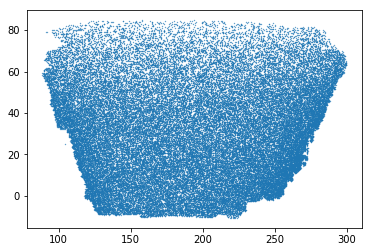

In [10]:
n_targets = len(data)
r = np.random.random(n_targets)
rr = r<0.001
plt.scatter(data['RA'][rr], data['DEC'][rr], s=0.1)

In [15]:
# Number of observations for ELG galaxies that were within reach of a fiber
def plot_avail(target_class='isELG'):
    ii = (data['NAVAIL_FIBER']!=0) & data[target_class]
    _ = plt.hist(data['NUMOBS'][ii], bins=np.arange(7))
    plt.xlabel('NUMOBS')
    plt.ylabel('Number of {} targets'.format(target_class))

    n_obs = np.count_nonzero((data['NAVAIL_FIBER']!=0) & data[target_class] & (data['NUMOBS']>0))
    n_avail = np.count_nonzero((data['NAVAIL_FIBER']!=0) & data[target_class])

    eff =  n_obs/n_avail
    plt.title("Global efficiency: {:.2f}".format(eff))

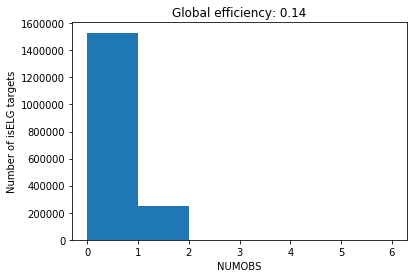

In [16]:
plot_avail(target_class='isELG')

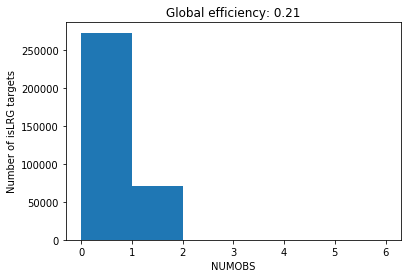

In [18]:
plot_avail(target_class='isLRG')

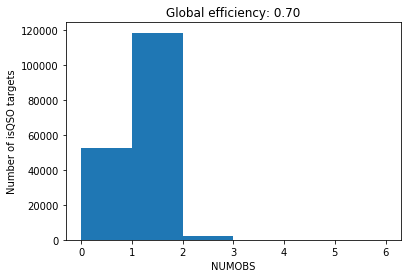

In [19]:
plot_avail(target_class='isQSO')

In [20]:
missed_qsos = (data['NAVAIL_FIBER']!=0) & (data['isQSO']) & (data['NUMOBS']==0)
print(np.count_nonzero(missed_qsos))

52253


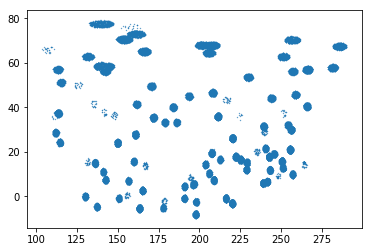

In [21]:
plt.scatter(data['RA'][missed_qsos], data['DEC'][missed_qsos], s=0.1)